# Import pakietów

In [873]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.datasets import load_breast_cancer

# Regularyzacja L1 (Lasso) i L2 (Ridge) dla Regresji Liniowej

In [874]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

X = data
y = target

In [875]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [876]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

**1. Podział zbioru na uczący i testowy**

In [877]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
print(X.shape[0])
print(float(X_train.shape[0]) / float(X.shape[0]))
print(float(X_test.shape[0]) / float(X.shape[0]))

506
0.7984189723320159
0.2015810276679842


In [878]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.fit_transform(X_test, y_test)

**2. Regresja liniowa**

In [879]:
regr = LinearRegression()
regr.fit(X_train, y_train)
y_train_pred = regr.predict(X_train)
y_pred = regr.predict(X_test)

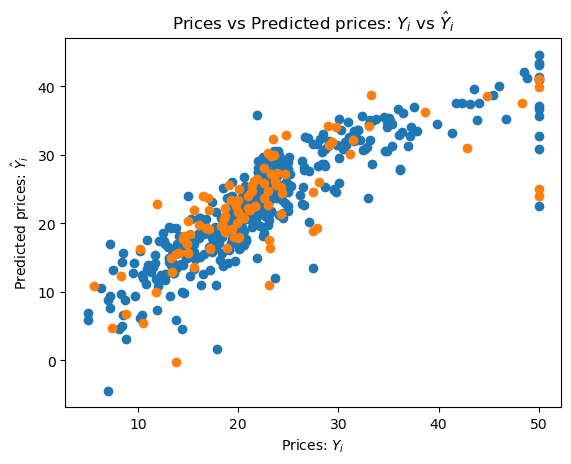

In [880]:
plt.scatter(y_train, y_train_pred)
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

**Jak powinien wyglądać wykres idealnie dopasowanych danych?**
Dla idealnie dopasowanych danych punkty na wykresie będą leżeć a prostej o równaniu y = x.

**Jak będzie wyglądał wykres w przypadku overfittingu?**
Dla overfittingu dane treningowe będą leżeć na prostej o równaniu y = x, a dane testowe będą chaotycznie rozrzucone na wykresie, nie przypominając żadnego wzorca.

**3. Proszę policzyć Mean Squared Error dla predykcji na zbiorze testowym**

In [881]:
MSE = (1/y_test.shape[0])*((y_test - y_pred)**2).sum()
MSE

35.11642077929317

**4. Proszę zweryfikować model.score (Opis metryki dostępny jest w dokumentacji).
Powyższe metryki będą przydatne do porównania tego modelu z kolejnymi.**

In [882]:
regr.score(X_test, y_test)

0.5687450086990025

In [883]:
polynomial_features = PolynomialFeatures(degree=2)
X_train = polynomial_features.fit_transform(X_train, y_train)
X_test = polynomial_features.fit_transform(X_test, y_test)

In [884]:
regr = LinearRegression()
regr.fit(X_train, y_train)
y_train_pred = regr.predict(X_train)
y_pred = regr.predict(X_test)

In [885]:
MSE = (1/y_test.shape[0])*((y_test - y_pred)**2).sum() # Testowy
MSE

1.275297163841061e+21

In [886]:
MSE = (1/y_test.shape[0])*((y_train - y_train_pred)**2).sum() # Treningowy
MSE

17.193766915400825

In [887]:
regr.score(X_test, y_test) # Model jest bardzo zły (overfitting)

-1.5661569576098853e+19

**5. Lasso
Proszę wytrenować model manipulując parametrem α w zakresie 0.001 - 10 (dla kilku wartości). Proszę wyrysować wykres zależności MSE od α oraz model.score od α**

In [888]:
%%capture
MSE = []
score = []
al = []
for alpha in np.logspace(-3, 1, 100):
    clf = Lasso(alpha=alpha)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    MSE.append((1/y_test.shape[0])*((y_test - y_pred)**2).sum())
    score.append(clf.score(X_test, y_test))
    al.append(alpha)

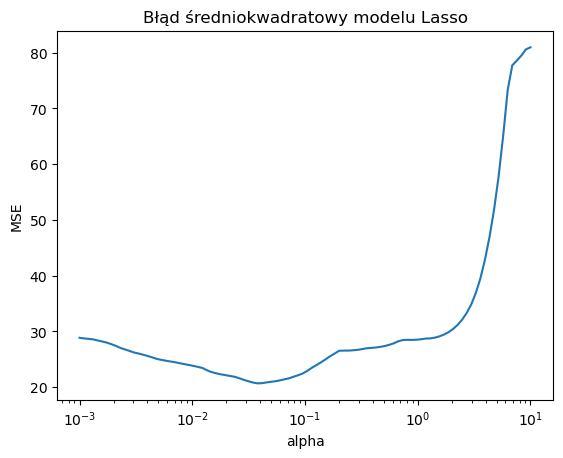

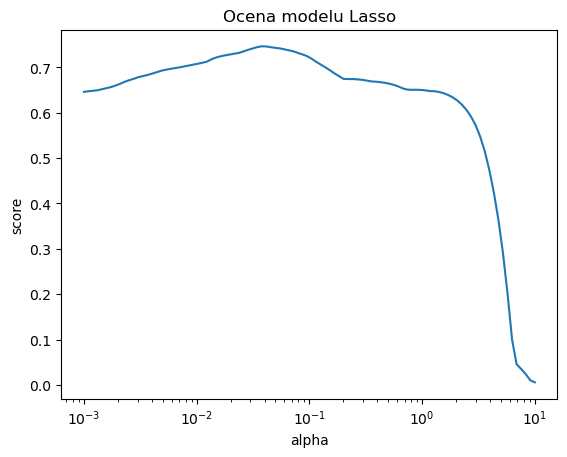

In [889]:
plt.semilogx(al, MSE)
plt.title("Błąd średniokwadratowy modelu Lasso")
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.show()
plt.semilogx(al, score)
plt.title("Ocena modelu Lasso")
plt.xlabel("alpha")
plt.ylabel("score")
plt.show()

**6. Ridge
Proszę wytrenować model manipulując parametrem α w zakresie 0.001 - 10 (dla kilku wartości). Proszę wyrysować wykres zależności MSE od α oraz model.score od α**

In [890]:
%%capture
MSE = []
score = []
al = []
for alpha in np.logspace(-3, 1, 100):
    clf = Ridge(alpha=alpha)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    MSE.append((1/y_test.shape[0])*((y_test - y_pred)**2).sum())
    score.append(clf.score(X_test, y_test))
    al.append(alpha)

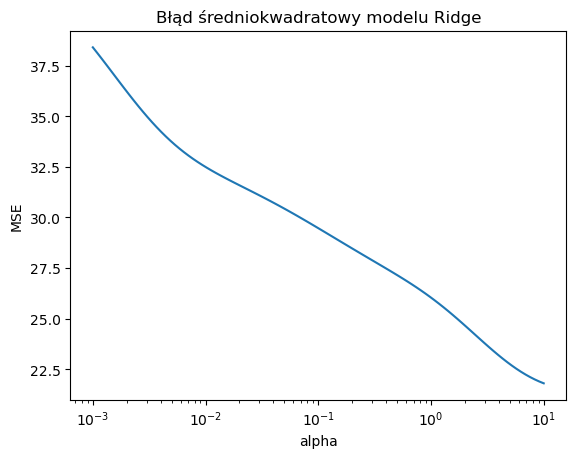

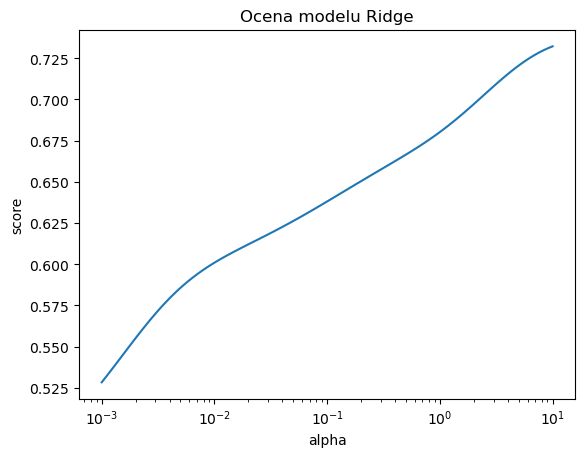

In [891]:
plt.semilogx(al, MSE)
plt.title("Błąd średniokwadratowy modelu Ridge")
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.show()
plt.semilogx(al, score)
plt.title("Ocena modelu Ridge")
plt.xlabel("alpha")
plt.ylabel("score")
plt.show()

# Regularyzacja dla Regresji Logistycznej

In [892]:
data = load_breast_cancer()

X = data.data
y = data.target

**1. Proszę podzielić zbiór na część treningową i część testową.**

In [893]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
# polynomial_features = PolynomialFeatures(degree=2)
# X_train = polynomial_features.fit_transform(X_train, y_train)
# X_test = polynomial_features.fit_transform(X_test, y_test)

**2. Z wykorzystaniem Regresji Logistycznej z biblioteki scikit-learn, proszę wytrenować model z regularyzacją L2 dla kilku wartości alfa z przedziału [0.0001; 1]. Każdy model należy sprawdzić na zbiorze testowym licząc jego skuteczność (accuracy)**

In [894]:
%%capture
score = []
C_tab = []
for C in np.logspace(-4, 0, 100):
    clf = LogisticRegression(penalty='l2',C=C)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score.append(clf.score(X_test, y_test))
    C_tab.append(C)

**3. Proszę wyrysować wykres zależności alfa od accuracy dla każdego z modeli**

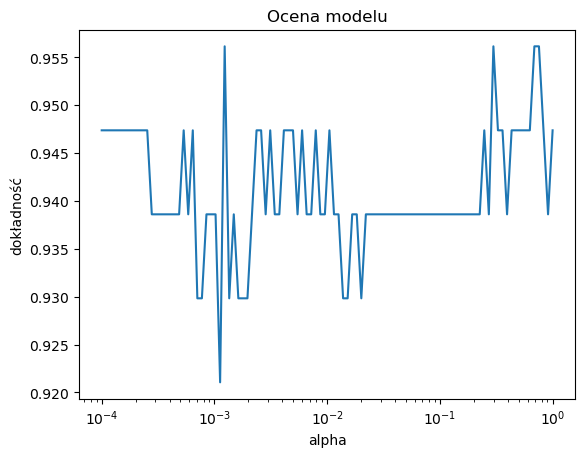

In [895]:
plt.semilogx(C_tab, score)
plt.title("Ocena modelu")
plt.xlabel("alpha")
plt.ylabel("dokładność")
plt.show()